# **Importing libraries**

In [ ]:
## import commands of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# **Importing dataset**

In [ ]:
## Importing our both train and test dataset
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [ ]:
## Checking train dataset head values
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# **Data preprocessing**

The data must first be preprocessed to get it into an analysis-ready state before we can perform any feature engineering. Compared to the competition data, the data we utilised in the course was a little bit easier. We must: for the Ames competition dataset.



* **Load:** data from CSV files to be loaded
*  **Clean up** the data to remove any  mistakes or discrepancies.
* **Encoding:** encrypt the type of statistical data (numeric, categorical)

* **Missing values:** Add any values that are missing










In [ ]:
##check dataset shape
train_df.shape

(1460, 81)

We have 81 columns and 1460 observation in our training dataset

In [ ]:
# check dataset columns info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# print 5 point summary of train data
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
# print 5 point summary of train  of categorical columns
train_df.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

# **Missing values checking and handling**

In [ ]:
## Checking about the missing values percentage in our train dataset
miss_per=train_df.isnull().sum()/train_df.shape[0]*100
miss_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [ ]:
## Let's drop the columns that contain greater then 17% missing values columns from both train and test data
drop_col=miss_per[miss_per>=17].keys()
train_df.drop(columns=drop_col,inplace=True)
test_df.drop(columns=drop_col,inplace=True)

In [ ]:
### Filling values with most frequent values of each column
missing_num=[var for var in train_df if train_df[var].isnull().sum()>0]
for columns in missing_num:
  train_df[columns]=train_df[columns].fillna(train_df[columns].mode()[0])
  test_df[columns]=test_df[columns].fillna(test_df[columns].mode()[0])

In [ ]:
# double check either missing values has been filled or not
missing_num=[var for var in train_df if train_df[var].isnull().sum()>0]
missing_num

[]

We can see the list is empty that's means all the columns missing values has been filled sucessfully.

# **EDA(exploratory Data Analysis)**

In [ ]:
## check training dataset columns
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [ ]:
train_df.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2008        WD         Normal    208500  
1       0       5    2007        WD         Normal    181500  
2       0       9    2008        WD         Normal    223500  
3       0       2    2006        WD        Abnorml    140000  
4       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

Text(0.5, 1.0, 'House Price vs YearSold')

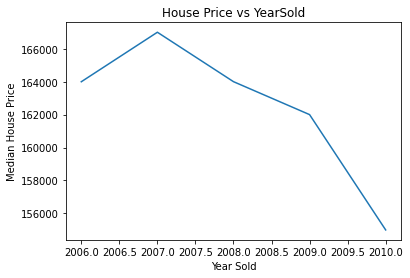

In [ ]:
## We will check whether there is a relation between year the house is sold and the sales price

train_df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

There is the dataset from 2006 to 2010. we observed that the price decerecased after 2006 due to some reasons.

In [ ]:
## get unique value counts of SaleCondition
train_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [ ]:
## let's see 5 maximum house prices
## Check most high rates houses
train_df.nlargest(5,'SalePrice')

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
691    692          60       RL    21535   Pave      IR1         Lvl   
1182  1183          60       RL    15623   Pave      IR1         Lvl   
1169  1170          60       RL    35760   Pave      IR1         Lvl   
898    899          20       RL    12919   Pave      IR1         Lvl   
803    804          60       RL    13891   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
691     AllPub    Corner       Gtl  ...             0         0           0   
1182    AllPub    Corner       Gtl  ...             0         0           0   
1169    AllPub   CulDSac       Gtl  ...             0         0           0   
898     AllPub    Inside       Gtl  ...             0         0           0   
803     AllPub    Inside       Gtl  ...             0         0         192   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
691         0       0       1    2007        WD         Normal    755000  
1182      555       0       7    2007        WD        Abnorml    745000  
1169        0       0       7    2006        WD         Normal    625000  
898         0       0       3    2010       New        Partial    611657  
803         0       0       1    2009       New        Partial    582933  

[5 rows x 75 columns]

We can see that there is house that sold maximum is the 755000 price.

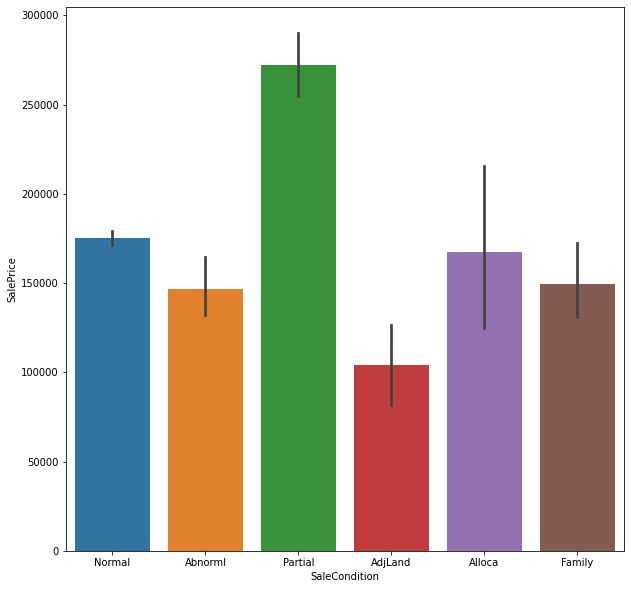

In [ ]:
## see comparison with SaleCondition and SalePrice
plt.figure(figsize=(10,10))
sns.barplot(x = train_df['SaleCondition'], y = train_df['SalePrice'])

We can see the bar graph of each condition and sale prices. we observed that most of the houses sold were partial.

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train_df[numerical_features].head()

Number of numerical variables:  37


Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  \
0       196.0         706           0  ...           0           61   
1         0.0         978           0  ...         298            0   
2       162.0         486           0  ...           0           42   
3         0.0         216           0  ...           0           35   
4       350.0         655           0  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 37 columns]

In [ ]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train_df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [ ]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

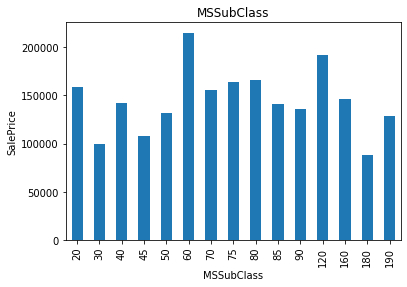

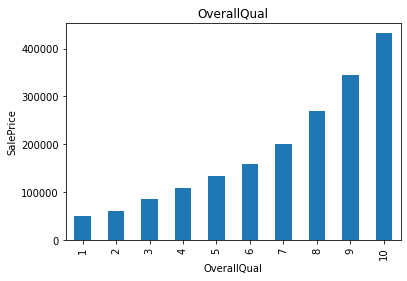

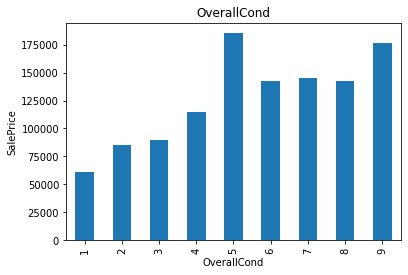

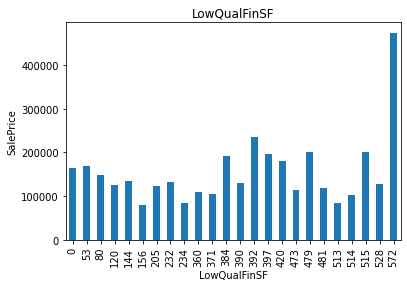

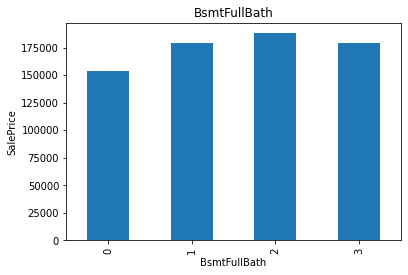

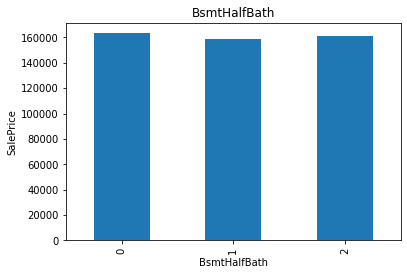

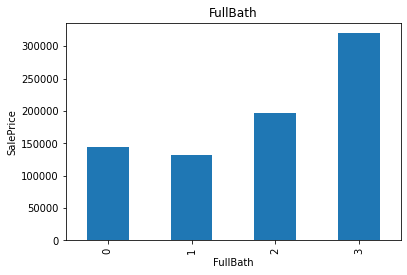

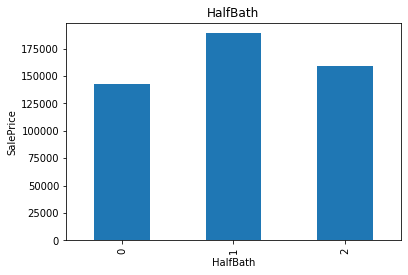

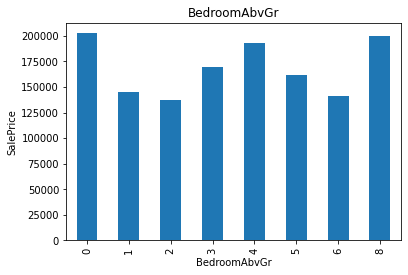

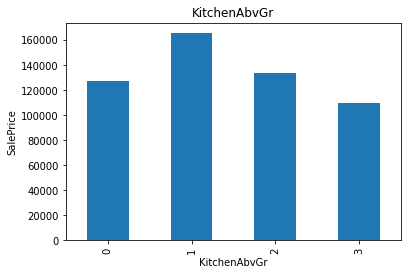

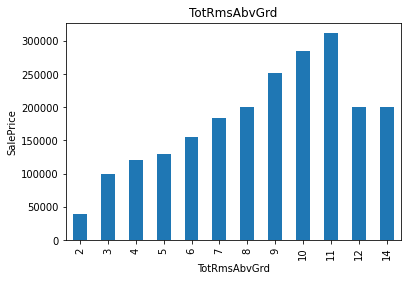

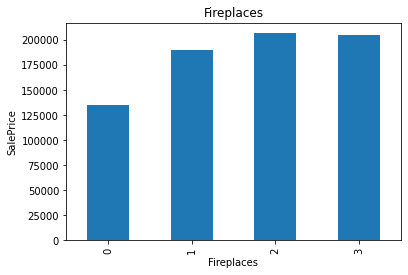

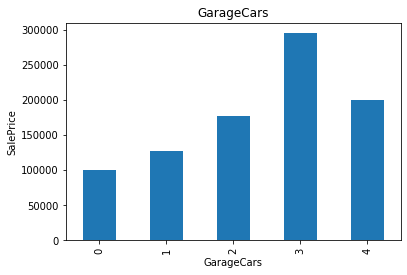

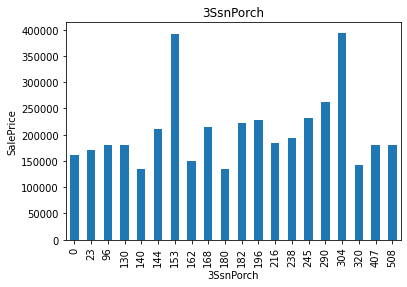

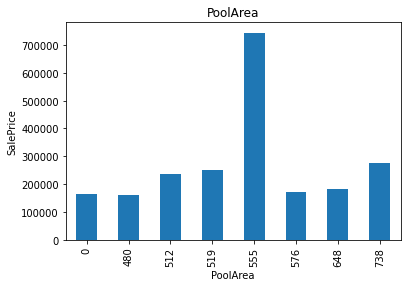

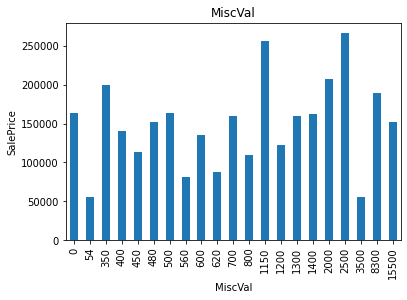

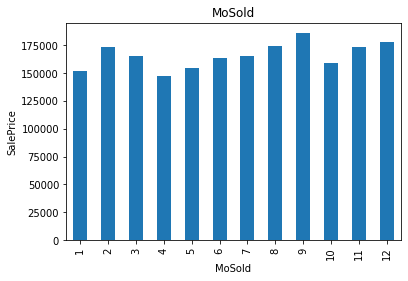

In [ ]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=train_df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 15


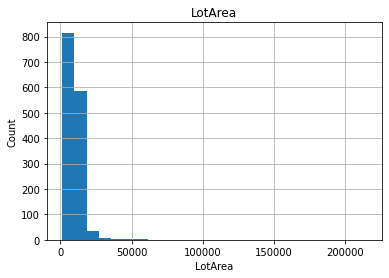

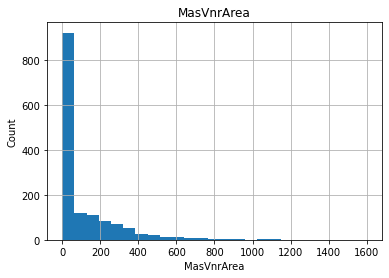

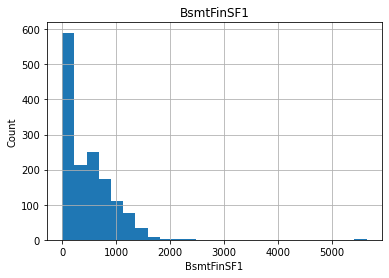

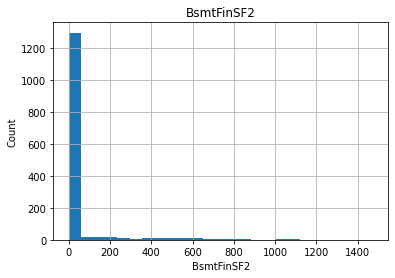

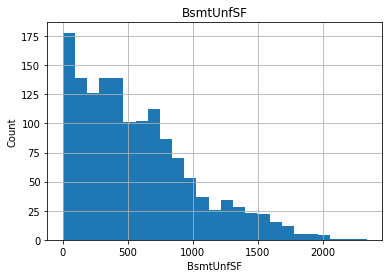

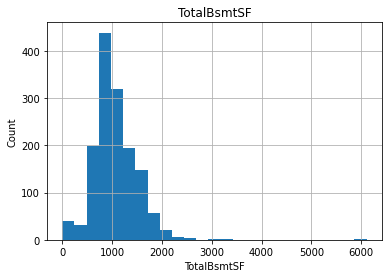

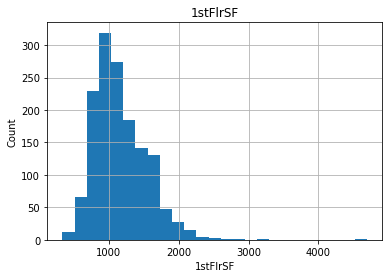

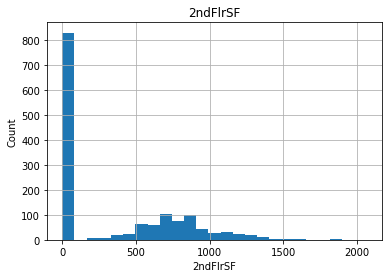

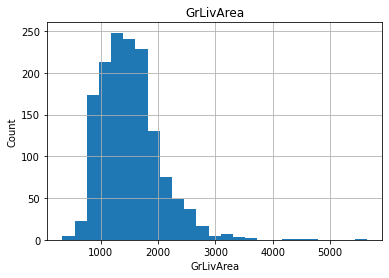

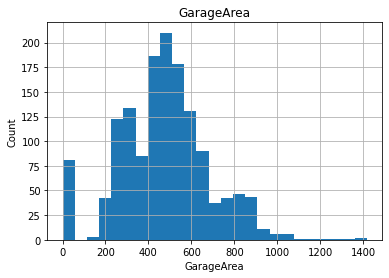

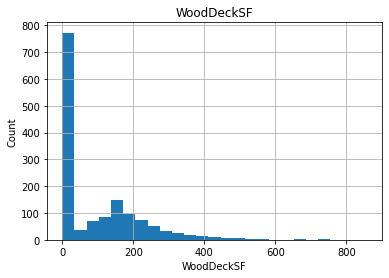

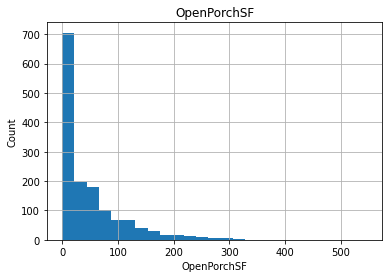

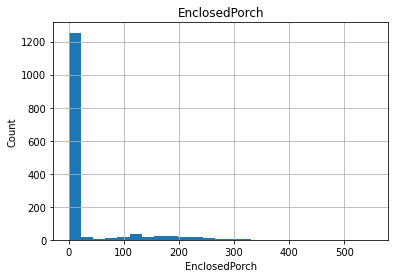

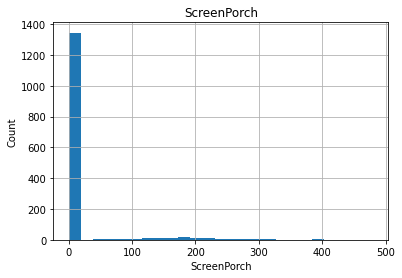

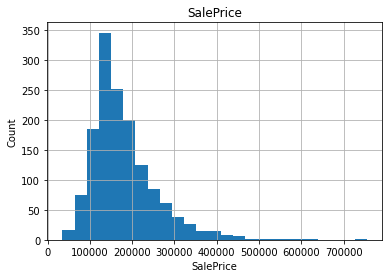

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=train_df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


In [ ]:
categorical_features=[feature for feature in train_df.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
### Let's create scatter plot of each columns corresponds to the sale prices of house
## Try to see the realtionships of different columns with age and see which changes comes
num_val=train_df.select_dtypes(include=['float64','int64'])
features=num_val.drop(columns='SalePrice').columns
for i in features:
  fig=px.scatter(train_df,x=i, y='SalePrice',trendline="ols",labels=i)
  fig.show()

# **Feature Engineering**

# **Label Encoding**

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [ ]:
#### changing the all  categorical columns into the numeric form
cat_val=train_df.select_dtypes(include=['bool','category','object'])
for var in cat_val:
  le=LabelEncoder()
  train_df[var]=le.fit_transform(train_df[var])
  test_df[var]=le.fit_transform(test_df[var])

In [ ]:
## let's see dataset after label encoding
train_df.head()

Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0   1          60         3     8450       1         3            3   
1   2          20         3     9600       1         3            3   
2   3          60         3    11250       1         0            3   
3   4          70         3     9550       1         0            3   
4   5          60         3    14260       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          2          0  ...              0          0   
2          0          4          0  ...              0          0   
3          0          0          0  ...            272          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8              4   
1            0         0        0       5    2007         8              4   
2            0         0        0       9    2008         8              4   
3            0         0        0       2    2006         8              0   
4            0         0        0      12    2008         8              4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 75 columns]

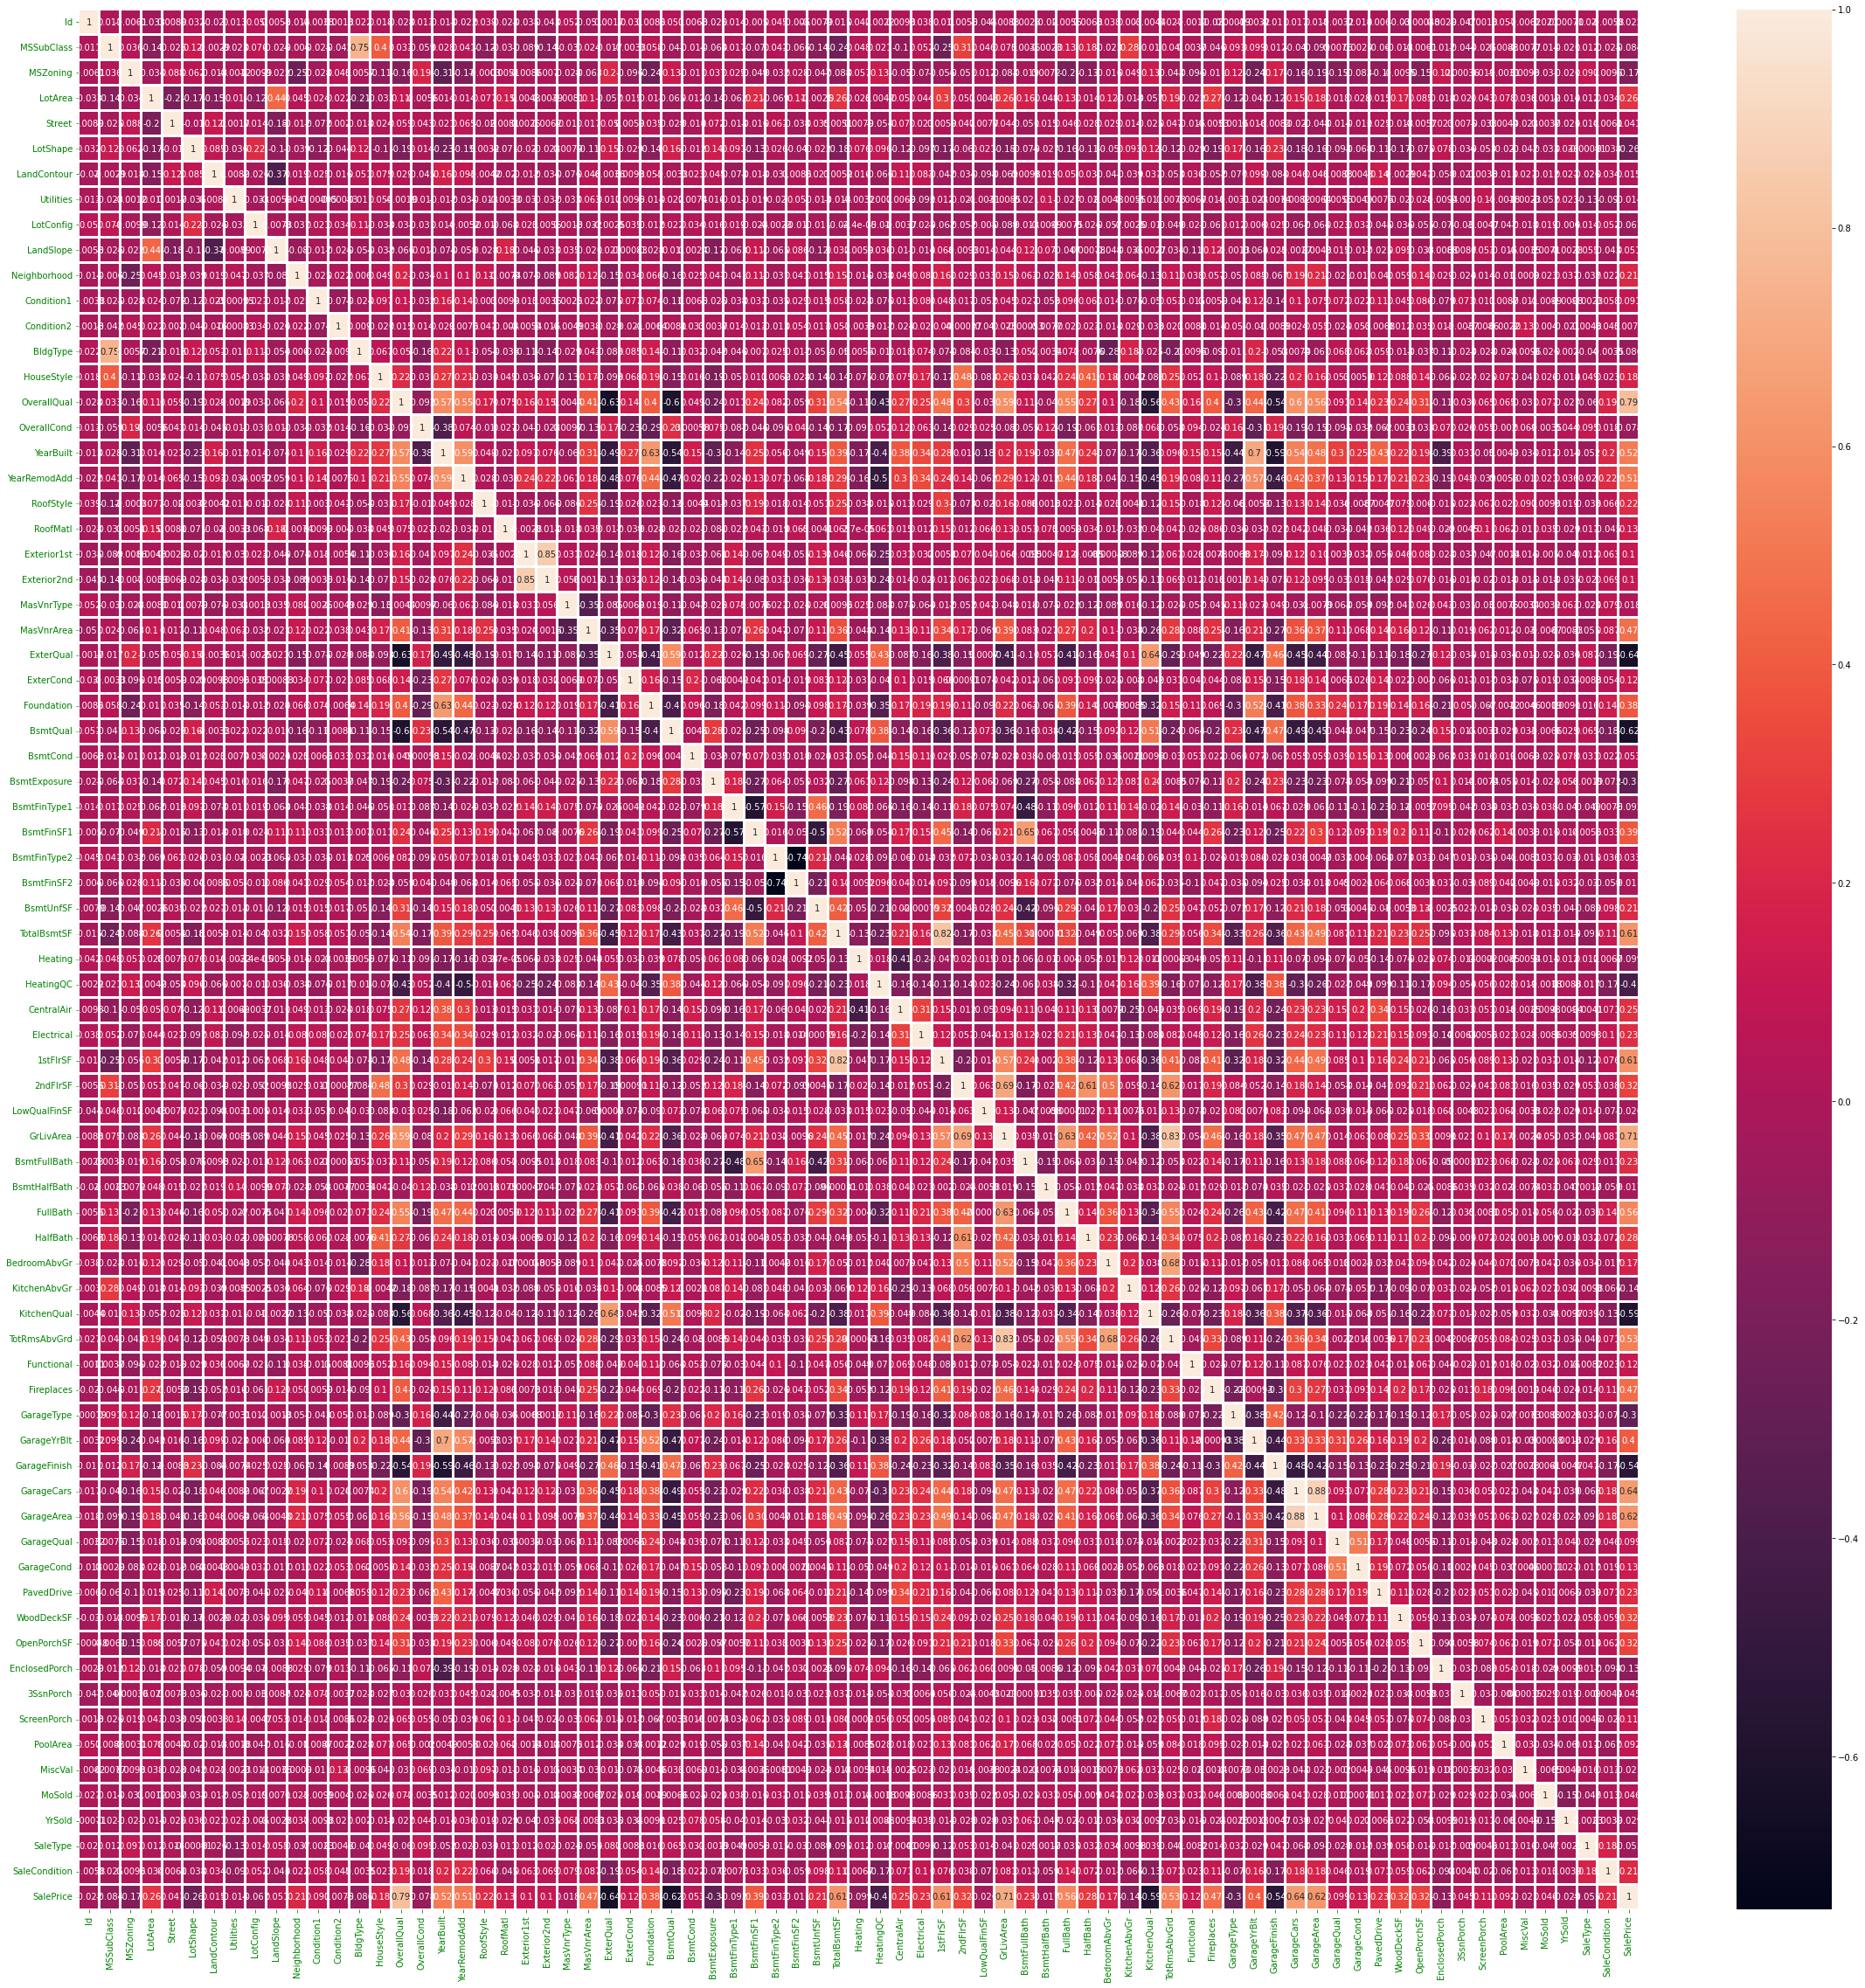

In [ ]:
### Correaltion matrix fo checking the dependencies of each column on each others
### Correlational graphs
plt.figure(figsize=(40,40))
ax=sns.heatmap(train_df.corr(),annot=True,linewidth=2,linestyle='--',color='k')
ax.tick_params(color='g',labelsize=10,labelcolor='g')

In [ ]:
### getting the only columns that hascorrealation minimum greater then 0.5.
train_df.corr()['SalePrice'][train_df.corr()['SalePrice']>0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

# **Creating dependent and independet features variables**

In [ ]:
##taking x as the independent important feature variable and y is dependent variable that contain our target feature
X=train_df[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea',
      'FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
y=train_df['SalePrice']

# Spliting the dataset into training and validation

In [ ]:
### import command of for spliiting the dataset
from sklearn.model_selection import train_test_split

### split data 80% for the training our model and 10%  for validation of  our model
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=0)

# **Decision Tree model**

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

# hyper parameter tunning

In [ ]:
# import comand of gridsearchcv
from sklearn.model_selection import GridSearchCV
# choosing different parameter for test
params={
     'criterion' :["squared_error", "friedman_mse", "absolute_error","poisson"],
     'splitter':["best", "random"],
    'max_depth':[20,30]
}
# Decision tree  model
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor(random_state=0,)

# Applying Gridsearchcv by giving model random forest
grid_search=GridSearchCV(DT_model, param_grid=params, cv=5)
grid_search.fit(x_train,y_train)

# Checking random forest best parameters
grid_search.best_params_

{'criterion': 'absolute_error', 'max_depth': 20, 'splitter': 'best'}

# model fitting and evaluation

In [ ]:
# train model on best parameters that we got using grid seach cv
DT_model =grid_search.best_estimator_
DT_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=20, random_state=0)

In [ ]:
#explained_variance_score, mean_squared_error, r2_score for validation dataset
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
pred=DT_model.predict(x_val)
print("Mean-Squared Error:",mean_squared_error(y_val,pred))
print("Explained Variance Score:",explained_variance_score(y_val,pred))
print("r2_Score:",r2_score(y_val,pred))

Mean-Squared Error: 1340551638.203767
Explained Variance Score: 0.8049326300157003
r2_Score: 0.8049288199794904


# **Random Forest Model**

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

# hyper parameter tunning

In [ ]:
# import comand of gridsearchcv
from sklearn.model_selection import GridSearchCV
# choosing different parameter for test
params={
     'n_estimators':[50,100],
    'max_depth':[20,30]
}
# Random forest model
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(random_state=2002397)

# Applying Gridsearchcv by giving model random forest
grid_search=GridSearchCV(RFR, param_grid=params,cv=5)
grid_search.fit(x_train,y_train)

# Checking random forest best parameters
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 50}

# model fitting and evaluation

In [ ]:
# train model on best parameters that we got using grid seach cv
RFR_model =grid_search.best_estimator_
RFR_model.fit(x_train,y_train)

# prediction
pred=RFR_model.predict(x_val)
#evaluation
print("Mean-Squared Error:",mean_squared_error(y_val,pred))
print("Explained Variance Score:",explained_variance_score(y_val,pred))
print("r2_Score:",r2_score(y_val,pred))

Mean-Squared Error: 746419165.0478171
Explained Variance Score: 0.8922544761802671
r2_Score: 0.8913843650880169


# **Ridge Regression model**

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

# parameters tunning using gridsearch cv

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[10**3, 10**3.5, 10**4, 10**4.5,10**5,10**5.5,10**6,10**6.5,10**7,10**7.5,10**8,10**8.5,10**9]}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters,cv=10)

#fit the grid search
Ridge_reg.fit(x_train,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

Ridge(alpha=1000)


In [ ]:
# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(x_train,y_train)

#explained_variance_score, mean_squared_error, r2_score for validation dataset
pred=best_model.predict(x_val)
print("Mean-Squared Error:",mean_squared_error(y_val,pred))
print("Explained Variance Score:",explained_variance_score(y_val,pred))
print("r2_Score:",r2_score(y_val,pred))

Mean-Squared Error: 1402733293.0036361
Explained Variance Score: 0.7963484230621591
r2_Score: 0.7958804189841423


# **Lasso Regression model**

In statistics and machine learning, lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

# parameter tunning

In [ ]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[10**3, 10**3.5, 10**4, 10**4.5,10**5,10**5.5,10**6,10**6.5,10**7,10**7.5,10**8,10**8.5,10**9]}

# define the model/ estimator
model = Lasso()

# define the grid search
Lasso_reg= GridSearchCV(model, parameters,cv=10)

#fit the grid search
Lasso_reg.fit(x_train,y_train)

# best estimator
print(Lasso_reg.best_estimator_)

Lasso(alpha=1000)


In [ ]:
# best model
Lasso_model =Lasso_reg.best_estimator_
Lasso_model.fit(x_train,y_train)

#explained_variance_score, mean_squared_error, r2_score for validation dataset
pred=best_model.predict(x_val)
print("Mean-Squared Error:",mean_squared_error(y_val,pred))
print("Explained Variance Score:",explained_variance_score(y_val,pred))
print("r2_Score:",r2_score(y_val,pred))

Mean-Squared Error: 1402733293.0036361
Explained Variance Score: 0.7963484230621591
r2_Score: 0.7958804189841423


# **XGBoost Regressor**

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

In [ ]:
#import command of xgboost
from sklearn.ensemble import GradientBoostingRegressor
xgboost_reg=GradientBoostingRegressor()
xgboost_reg.fit(x_train, y_train)

#explained_variance_score, mean_squared_error, r2_score for validation dataset
pred=xgboost_reg.predict(x_val)
print("Mean-Squared Error:",mean_squared_error(y_val,pred))
print("Explained Variance Score:",explained_variance_score(y_val,pred))
print("r2_Score:",r2_score(y_val,pred))

Mean-Squared Error: 689557009.3990194
Explained Variance Score: 0.8996746680552646
r2_Score: 0.8996586959566013


We can see the accuracy score of all the model and we can see that the ensemble model xgboost is working good as compared to other models so we will use this as the prediction of test data.

# **Prediction on test data**

In [ ]:
test=test_df[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea',
      'FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(),inplace=True)
test['GarageCars'].fillna(test['GarageCars'].mean(),inplace=True)
test['GarageArea'].fillna(test['GarageArea'].mean(),inplace=True)

In [ ]:
Y_pred=xgboost_reg.predict(test)

In [ ]:
# prepare a submission file
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('submission.csv', index=False)